In [1]:
# import the libraries
import cv2
import numpy as np
import pylab
from cudamodules import StereoMatchingBasic
from tools import PlotTools

First we need to load test images

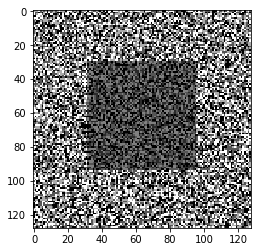

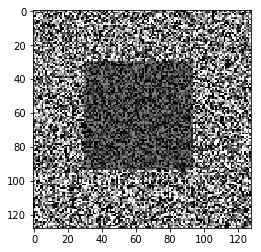

In [2]:
img1 = cv2.imread('Data/leftTest.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('Data/rightTest.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
PlotTools.display_img(img1)
PlotTools.display_img(img2)

CSS
===

the below images shows the matching with the CSS score function.

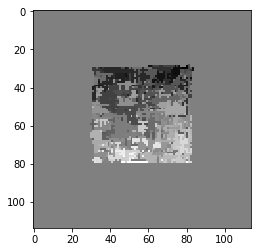

In [3]:
PlotTools.display_and_save(StereoMatchingBasic.stereo_matching_basic(img1, img2, 15), "img/PS2-1-a-1")

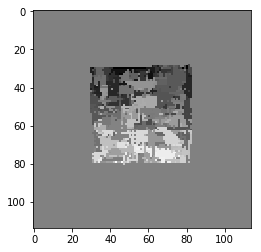

In [4]:
PlotTools.display_and_save(StereoMatchingBasic.stereo_matching_basic(img2, img1, 15), "img/PS2-1-a-2")

Normalized Cross Correlation
============================

the above images shows the matches with the cross correlation score function.

In [5]:
kernel = StereoMatchingBasic.KERNEL_CROSS_CORR
print(kernel)


float best;

__shared__ float scores[resdx];
__syncthreads();

int32_t aij;
int32_t bij;
float sa = 0.0;
float sb = 0.0;
float d = 0.0;
for( i=-wdiam; i<=wdiam; i++){
    for( j=-wdiam; j<=wdiam; j++){
        aij = a[(ay+i)+((ax+j)*imy)];
        bij = b[(ay+i)+((bx+j)*imy)];
        sa = sa + ((float)(aij*aij));
        sb = sb + ((float)(bij*bij));
        d = d + ((float)(aij * bij));
    }
}
scores[tix] = d / sqrtf(sa*sb);



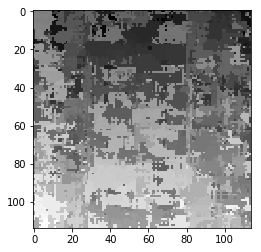

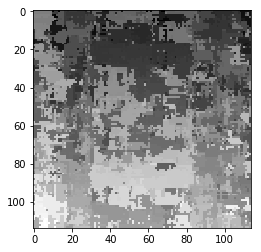

In [8]:
PlotTools.display_img(StereoMatchingBasic.stereo_matching_basic(img1, img2, 15, kernel))
PlotTools.display_img(StereoMatchingBasic.stereo_matching_basic(img2, img1, 15, kernel))

cudamodules/StereoMatchingBasic.py:110: UserWarning: The CUDA compiler succeeded, but said the following:
nvcc warning : The 'compute_20', 'sm_20', and 'sm_21' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).

  """)


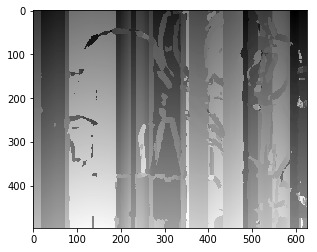

In [7]:
PlotTools.display_img(StereoMatchingBasic.stereo_matching_basic(
    cv2.cvtColor(cv2.imread("Data/proj2-pair1-Disp-L.png"), cv2.COLOR_BGR2GRAY),
    cv2.cvtColor(cv2.imread("Data/proj2-pair1-Disp-R.png"), cv2.COLOR_BGR2GRAY),
    15, kernel))